In [1]:
from PIL import Image, ImageDraw, ImageFont
from PIL import features
import os

In [2]:
print(features.check("raqm"))

True


In [3]:
# Specify your font path and size
font_path = "./Fonts/Amiko-Regular.ttf"  # Use any font file (e.g., Arial, Times New Roman, etc.)
font_size = 48  # Adjust the size as needed
output_dir = "sourceImages"  # Directory to save the generated images
os.makedirs(output_dir, exist_ok=True)

def text_to_image(text, font_path, font_size, height=100, padding=10, output_dir="output_images"):
    font = ImageFont.truetype(font_path, size=90, layout_engine=ImageFont.Layout.RAQM)

    # Create a temporary image to calculate the size of the text
    temp_image = Image.new("L", (1, 1), color=255)
    draw = ImageDraw.Draw(temp_image)

    # Calculate the bounding box of the text
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Adjust width based on the text length with added padding
    image_width = text_width + 2 * padding
    image_height = height

    # Create the final image with adjusted width
    image = Image.new("L", (image_width, image_height), color=255)
    draw = ImageDraw.Draw(image)

    # Calculate position to center the text vertically
    text_position = (padding, (image_height - text_height) // 2)

    # Draw text onto image
    draw.text(text_position, text, font=font, fill=0)  # Fill with black text on white background

    # Save image
    # image.save(os.path.join(output_dir, f"{text}.png"))
    return image


In [4]:
words = []
with open("./annotations.txt", "r", encoding="utf8") as f:
    words = f.readlines()
words = [x.replace("\n", "") for x in words]

परिहारण


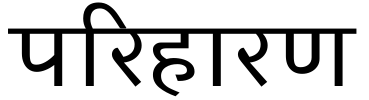

In [5]:
print(words[0])
text_to_image(words[0], font_path, font_size)

In [45]:
# Modify the process_images function to use the default font
def process_images_default_font(words, input_images_dir, output_source_dir, output_target_dir):
    for idx, word in enumerate(words, start=1):
        # Generate source image (word image)
        word_image = text_to_image(word, font_path, font_size)

        # Resize and pad to 256x256
        word_image_resized = resize_and_pad(word_image)
        word_image_resized.save(os.path.join(output_source_dir, f"{idx}.png"))

        # Open the corresponding target image (e.g., 1.png, 2.png)
        target_image_path = os.path.join(input_images_dir, f"{idx}.png")
        if os.path.exists(target_image_path):
            target_image = Image.open(target_image_path).convert("L")

            # Resize and pad to 256x256
            target_image_resized = resize_and_pad(target_image)
            target_image_resized.save(os.path.join(output_target_dir, f"{idx}.png"))

def resize_and_pad(image, target_size=(256, 256)):
    """Resize the image, maintaining the aspect ratio, and pad to target size with equal padding on both sides."""
    original_size = image.size
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))
    resized_image = image.resize(new_size, Image.Resampling.LANCZOS)

    # Create a new blank image with target size (256x256) and white background
    new_image = Image.new("L", target_size, color=255)

    # Calculate the position to center the resized image on the new canvas
    top_left_x = (target_size[0] - new_size[0] + 10) // 2  # Horizontal center
    top_left_y = (target_size[1] - new_size[1]) // 2  # Vertical center

    # Paste the resized image in the center
    new_image.paste(resized_image, (top_left_x, top_left_y))

    return new_image

# Running the function with default font
process_images_default_font(words, "./WordImages", "./SourceImages", "./TargetImages")

In [47]:
import os
from PIL import Image

# Paths to the two folders containing your images
folder1 = "./SourceImages"  # Machine-written images
folder2 = "./TargetImages"  # Handwritten images
output_folder = "./ConcatenatedImages"  # Where concatenated images will be saved

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in one of the folders (assuming both folders have the same files)
file_names = os.listdir(folder1)

for file_name in file_names:
    # Load images from both folders
    img1_path = os.path.join(folder1, file_name)
    img2_path = os.path.join(folder2, file_name)
    
    img1 = Image.open(img1_path).convert('L')
    img2 = Image.open(img2_path).convert('L')
    
    # Check if both images are 256x256 (optional check)
    assert img1.size == (256, 256), f"Image {file_name} in folder1 is not 256x256."
    assert img2.size == (256, 256), f"Image {file_name} in folder2 is not 256x256."
    
    # Concatenate images horizontally (side by side)
    concatenated_img = Image.new('L', (512, 256))  # New image of size 512x256
    concatenated_img.paste(img1, (0, 0))  # Paste img1 on the left
    concatenated_img.paste(img2, (256, 0))  # Paste img2 on the right
    
    # Save the concatenated image to the output folder
    output_path = os.path.join(output_folder, file_name)
    concatenated_img.save(output_path)

    # print(f"Saved {output_path}")
